In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("CodeCraft ML Competition Dataset.xlsx", sheet_name='Sheet1')


In [5]:
df = df[df['Average_Cost'].str.contains(r'^₹?\d+', na=False)]
df = df[df['Minimum_Order'].str.contains(r'^₹?\d+', na=False)]

In [6]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Average_Cost'] = df['Average_Cost'].str.replace('₹', '', regex=False).str.replace(',', '').astype(float)
df['Minimum_Order'] = df['Minimum_Order'].str.replace('₹', '', regex=False).str.replace(',', '').astype(float)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Delivery_Time'] = df['Delivery_Time'].str.extract(r'(\d+)').astype(float)

In [7]:
df.dropna(subset=[
    'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order', 'Votes',
    'Reviews', 'Delivery_Time', 'Rating'
], inplace=True)

In [8]:
df['Votes'] = np.log1p(df['Votes'])
df['Reviews'] = np.log1p(df['Reviews'])

In [9]:
df['Cost_Per_Order'] = df['Average_Cost'] / df['Minimum_Order']
df['Engagement'] = df['Votes'] * df['Reviews']
df['Num_Cuisines'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))

In [10]:
df['Location_Encoded'] = df['Location'].map(df.groupby('Location')['Rating'].mean())
df['Cuisines_Encoded'] = df['Cuisines'].map(df.groupby('Cuisines')['Rating'].mean())

In [11]:
features = [
    'Average_Cost', 'Minimum_Order', 'Votes', 'Reviews', 'Delivery_Time',
    'Cost_Per_Order', 'Engagement', 'Num_Cuisines',
    'Location_Encoded', 'Cuisines_Encoded'
]

In [12]:
X = df[features]
y = df['Rating']

In [13]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y[X.index]  # Align target with cleaned features

C:\Users\ayush\AppData\Local\Temp\ipykernel_20540\3275018184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20540\3275018184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [14]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y[X.index]  # Align target with cleaned features

C:\Users\ayush\AppData\Local\Temp\ipykernel_20540\3275018184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20540\3275018184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

In [18]:

xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)


In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [26]:
print(" Model trained successfully")
print(" RMSE:", rmse)
print(" R² Score:", r2)

 Model trained successfully
 RMSE: 0.2215931714937581
 R² Score: 0.7247289850549963


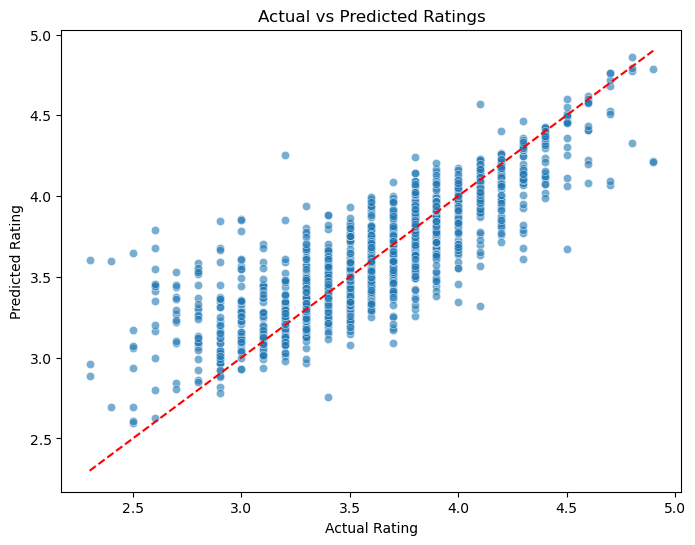

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_20540\3344862262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')


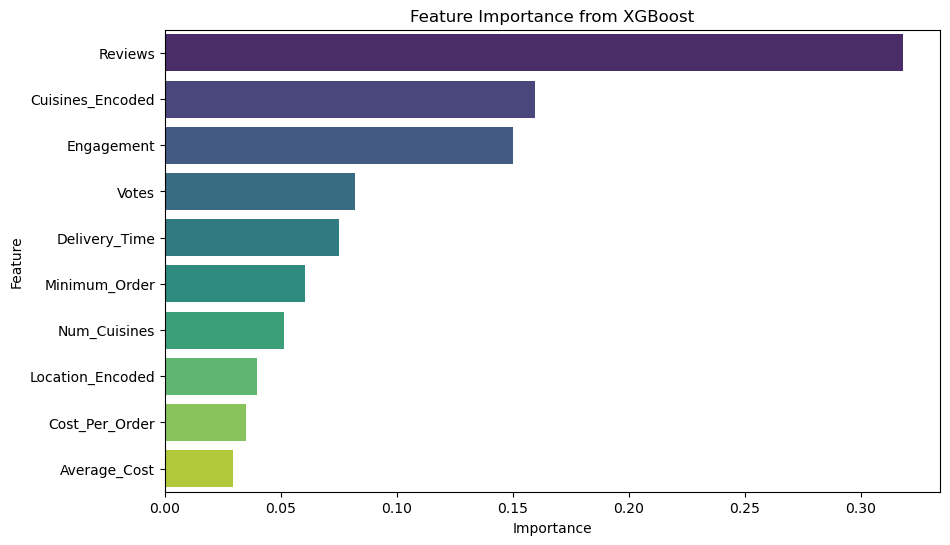

In [22]:
importances = xgb.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [32]:
print("\n--- Predict Restaurant Rating ---")

try:
    Average_Cost = float(input("Enter Average Cost (₹): "))
    Minimum_Order = float(input("Enter Minimum Order (₹): "))
    Votes_raw = float(input("Enter Votes (count): "))
    Reviews_raw = float(input("Enter Reviews (count): "))
    Delivery_Time = float(input("Enter Delivery Time (minutes): "))
    Num_Cuisines = int(input("Enter Number of Cuisines: "))
    Location = input("Enter Location (exact spelling): ").strip()
    Cuisines = input("Enter Cuisines (exact spelling): ").strip()

    # Compute encodings from your existing dataset df (make sure df is loaded)
    Location_Encoded = df.groupby('Location')['Rating'].mean().get(Location, df['Rating'].mean())
    Cuisines_Encoded = df.groupby('Cuisines')['Rating'].mean().get(Cuisines, df['Rating'].mean())

    # Derived features
    Votes = np.log1p(Votes_raw)
    Reviews = np.log1p(Reviews_raw)
    Cost_Per_Order = Average_Cost / Minimum_Order
    Engagement = Votes * Reviews

    # Prepare input DataFrame
    user_data = pd.DataFrame([[
        Average_Cost, Minimum_Order, Votes, Reviews, Delivery_Time,
        Cost_Per_Order, Engagement, Num_Cuisines,
        Location_Encoded, Cuisines_Encoded
    ]], columns=features)

    # Scale features
    user_data_scaled = scaler.transform(user_data)

    # Predict rating
    prediction = xgb.predict(user_data_scaled)[0]

    print(f"\nPredicted Restaurant Rating: {prediction:.2f}")

except Exception as e:
    print("\nInvalid input. Please enter correct data types.")
    print("Error:", e)



--- Predict Restaurant Rating ---

Predicted Restaurant Rating: 4.08


In [24]:
import pickle

# Assuming your trained model is 'xgb' and scaler is 'scaler'
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)



In [25]:
import pickle

location_encoding = df.groupby('Location')['Rating'].mean().to_dict()
cuisines_encoding = df.groupby('Cuisines')['Rating'].mean().to_dict()

with open('location_encoding.pkl', 'wb') as f:
    pickle.dump(location_encoding, f)

with open('cuisines_encoding.pkl', 'wb') as f:
    pickle.dump(cuisines_encoding, f)
